<a href="https://colab.research.google.com/github/chhak2021/Colab/blob/main/5_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_CNN_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
날짜 : 2021/07/13
이름 : 김철학
내용 : 텐서플로 CNN 실습하기
"""
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from sklearn.model_selection import train_test_split
from PIL import Image
tf.__version__

'2.5.0'

In [2]:
#데이터 로드
(cifar_train_data, cifar_train_label), (cifar_test_data, cifar_test_label) = load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
#데이터 확인
print(cifar_train_data.shape)
print(cifar_test_data.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
plt.imshow(cifar_train_data[0])
plt.show()

[23955  5974 35734  9159 14651 48569 22543 49518   882]


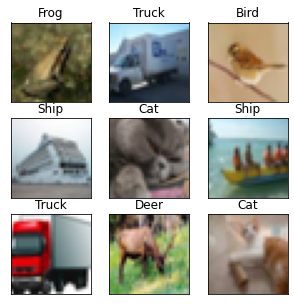

In [ ]:
#데이터 샘플 이미지 확인
label_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
random_idx = np.random.randint(50000, size=9)
print(random_idx)

plt.figure(figsize=(5, 5))

for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  label = cifar_train_label[idx][0]
  plt.imshow(cifar_train_data[idx, :])
  plt.title(label_names[label])

In [ ]:
#모델학습을 위한 데이터 전처리(정규화)
cifar_train_data = cifar_train_data / 255
cifar_test_data = cifar_test_data / 255

#데이터의 라벨을 범주형(one-hot encoding)으로 변환
cifar_train_label = to_categorical(cifar_train_label)
cifar_test_label = to_categorical(cifar_test_label)

In [ ]:
#학습모델 구성
model = Sequential()

#CNN층
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding='same'))
model.add(Dropout(0.2)) # 과대적합 문제 해결을 위한 Dropout 기법

#FCNN층
model.add(Flatten())  #입력층
model.add(Dense(256, activation='relu'))   #은닉층
model.add(Dense(10, activation='softmax')) #출력층

#모델확인
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
#학습모델 설정
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
#학습하기
model.fit(cifar_train_data, cifar_train_label, epochs=20, batch_size=128)

Epoch 1/20
391/391 [==============================] - 12s 29ms/step - loss: 1.7179 - acc: 0.3629
Epoch 2/20
391/391 [==============================] - 11s 29ms/step - loss: 1.1891 - acc: 0.5708
Epoch 3/20
391/391 [==============================] - 11s 29ms/step - loss: 0.9439 - acc: 0.6643
Epoch 4/20
391/391 [==============================] - 11s 29ms/step - loss: 0.8102 - acc: 0.7148
Epoch 5/20
391/391 [==============================] - 11s 29ms/step - loss: 0.7140 - acc: 0.7499
Epoch 6/20
391/391 [==============================] - 11s 29ms/step - loss: 0.6485 - acc: 0.7714
Epoch 7/20
391/391 [==============================] - 11s 29ms/step - loss: 0.5865 - acc: 0.7938
Epoch 8/20
391/391 [==============================] - 11s 29ms/step - loss: 0.5332 - acc: 0.8122
Epoch 9/20
391/391 [==============================] - 11s 29ms/step - loss: 0.4891 - acc: 0.8275
Epoch 10/20
391/391 [==============================] - 11s 29ms/step - loss: 0.4527 - acc: 0.8401
Epoch 11/20
391/391 [========

In [ ]:
#평가하기
model.evaluate(cifar_test_data, cifar_test_label)

313/313 [==============================] - 2s 7ms/step - loss: 0.6947 - acc: 0.8023


[0.6946773529052734, 0.802299976348877]

In [ ]:
#모델저장
model.save('/content/drive/MyDrive/Colab Notebooks/file/cifar_model1.h5')